In [2]:
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
df = pd.read_csv('police.csv')
df.head()

,stop_date,stop_time,county_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,01:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,2005-01-18,08:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,2005-01-23,23:15,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2005-02-20,17:15,NaN,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,2005-03-14,10:00,NaN,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


In [4]:
df.columns

Index(['stop_date', 'stop_time', 'county_name', 'driver_gender',
       'driver_age_raw', 'driver_age', 'driver_race', 'violation_raw',
       'violation', 'search_conducted', 'search_type', 'stop_outcome',
       'is_arrested', 'stop_duration', 'drugs_related_stop'],
      dtype='object')

In [5]:
df.shape

(91741, 15)

In [7]:
df.isnull().sum()

stop_date                 0
stop_time                 0
county_name           91741
driver_gender          5335
driver_age_raw         5327
driver_age             5621
driver_race            5333
violation_raw          5333
violation              5333
search_conducted          0
search_type           88545
stop_outcome           5333
is_arrested            5333
stop_duration          5333
drugs_related_stop        0
dtype: int64

In [8]:
df.isna().sum()

stop_date                 0
stop_time                 0
county_name           91741
driver_gender          5335
driver_age_raw         5327
driver_age             5621
driver_race            5333
violation_raw          5333
violation              5333
search_conducted          0
search_type           88545
stop_outcome           5333
is_arrested            5333
stop_duration          5333
drugs_related_stop        0
dtype: int64

In [9]:
df.shape

(91741, 15)

# 1. Remove columns which only contain missing values.

In [13]:
df = df.dropna(axis='columns', how='all')

In [15]:
df.head()

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,01:55,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,2005-01-18,08:15,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,2005-01-23,23:15,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2005-02-20,17:15,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,2005-03-14,10:00,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


In [16]:
df.shape

(91741, 14)

# 2. Who speeds more often? Men or Women

In [17]:
df['violation'].value_counts()

Speeding               48463
Moving violation       16224
Equipment              11020
Other                   4317
Registration/plates     3432
Seat belt               2952
Name: violation, dtype: int64

In [33]:
df.groupby(['driver_gender'])['violation'].value_counts(normalize=True)

driver_gender  violation          
F              Speeding               0.658500
               Moving violation       0.136277
               Equipment              0.105780
               Registration/plates    0.043086
               Other                  0.029348
               Seat belt              0.027009
M              Speeding               0.524350
               Moving violation       0.207012
               Equipment              0.135671
               Other                  0.057668
               Registration/plates    0.038461
               Seat belt              0.036839
Name: violation, dtype: float64

In [34]:
df.groupby(['driver_gender'])['violation'].value_counts(normalize=True).loc[:, 'Speeding']

driver_gender
F    0.65850
M    0.52435
Name: violation, dtype: float64

In [35]:
df.groupby(['driver_gender'])['violation'].value_counts(normalize=True).unstack()

violation,Equipment,Moving violation,Other,Registration/plates,Seat belt,Speeding
driver_gender,,,,,,
F,0.105780,0.136277,0.029348,0.043086,0.027009,0.65850
M,0.135671,0.207012,0.057668,0.038461,0.036839,0.52435


In [29]:
filt = df['violation'] == 'Speeding'
df.loc[filt, 'driver_gender'].value_counts(normalize=True)

M    0.680527
F    0.319473
Name: driver_gender, dtype: float64

# 3. Does gender affects who gets searched during a stop?

In [36]:
df.head()

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,01:55,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,2005-01-18,08:15,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,2005-01-23,23:15,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2005-02-20,17:15,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,2005-03-14,10:00,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


In [38]:
df.groupby(['search_conducted'])['driver_gender'].value_counts()

search_conducted  driver_gender
False             M                60170
                  F                23040
True              M                 2725
                  F                  471
Name: driver_gender, dtype: int64

# 4. During the search how often is the driver frisked?

In [39]:
df.head()

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,01:55,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,2005-01-18,08:15,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,2005-01-23,23:15,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2005-02-20,17:15,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,2005-03-14,10:00,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


In [61]:
df['search_type'].value_counts()

Incident to Arrest                                          1219
Probable Cause                                               891
Inventory                                                    220
Reasonable Suspicion                                         197
Protective Frisk                                             161
Incident to Arrest,Inventory                                 129
Incident to Arrest,Probable Cause                            106
Probable Cause,Reasonable Suspicion                           75
Incident to Arrest,Inventory,Probable Cause                   34
Incident to Arrest,Protective Frisk                           33
Probable Cause,Protective Frisk                               33
Inventory,Probable Cause                                      22
Incident to Arrest,Reasonable Suspicion                       13
Protective Frisk,Reasonable Suspicion                         11
Incident to Arrest,Inventory,Protective Frisk                 11
Inventory,Protective Fris

In [71]:
filt_frisk = df['search_type'].str.contains('Protective Frisk', na=False)
df.loc[filt_frisk, 'driver_gender'].value_counts()

M    245
F     29
Name: driver_gender, dtype: int64

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91741 entries, 0 to 91740
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   stop_date           91741 non-null  object 
 1   stop_time           91741 non-null  object 
 2   driver_gender       86406 non-null  object 
 3   driver_age_raw      86414 non-null  float64
 4   driver_age          86120 non-null  float64
 5   driver_race         86408 non-null  object 
 6   violation_raw       86408 non-null  object 
 7   violation           86408 non-null  object 
 8   search_conducted    91741 non-null  bool   
 9   search_type         3196 non-null   object 
 10  stop_outcome        86408 non-null  object 
 11  is_arrested         86408 non-null  object 
 12  stop_duration       86408 non-null  object 
 13  drugs_related_stop  91741 non-null  bool   
dtypes: bool(2), float64(2), object(10)
memory usage: 8.6+ MB


In [68]:
df['search_type'].str.contains('Protective Frisk').value_counts(dropna=False)

True     88545
False     2922
True       274
Name: search_type, dtype: int64

In [72]:
245+29

274

# 5. Which year had the least number of stops?

In [73]:
df.head()

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,01:55,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,2005-01-18,08:15,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,2005-01-23,23:15,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2005-02-20,17:15,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,2005-03-14,10:00,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


In [74]:
df.stop_date.dtype

dtype('O')

In [75]:
df.stop_date = pd.to_datetime(df.stop_date)

C:\Users\adity\anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [76]:
df.stop_date.head()

0   2005-01-02
1   2005-01-18
2   2005-01-23
3   2005-02-20
4   2005-03-14
Name: stop_date, dtype: datetime64[ns]

In [77]:
df['stop_date'] = df['stop_date'].astype('str')

In [78]:
df['stop_date'].dtype

dtype('O')

In [79]:
df.head()

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,01:55,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,2005-01-18,08:15,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,2005-01-23,23:15,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2005-02-20,17:15,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,2005-03-14,10:00,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


In [80]:
df['year'] = df['stop_date'].apply(lambda x: x.split('-')[0])
df['year'].head()

0    2005
1    2005
2    2005
3    2005
4    2005
Name: year, dtype: object

In [81]:
df.head()

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,year
0,2005-01-02,01:55,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,2005
1,2005-01-18,08:15,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,2005
2,2005-01-23,23:15,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,2005
3,2005-02-20,17:15,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,2005
4,2005-03-14,10:00,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,2005


In [83]:
df['year'] = df['year'].astype(str)

In [89]:
df['year'].value_counts(ascending=True)

2005     2558
2010     7561
2009     7908
2013     7924
2011     8126
2015     8599
2008     8752
2014     9228
2007     9476
2006    10639
2012    10970
Name: year, dtype: int64

# 6. How does drug activity change by daytime?

In [90]:
df.head()

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,year
0,2005-01-02,01:55,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,2005
1,2005-01-18,08:15,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,2005
2,2005-01-23,23:15,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,2005
3,2005-02-20,17:15,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,2005
4,2005-03-14,10:00,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,2005


In [104]:
df['stop_time'] = df['stop_time'].astype(str)

In [91]:
df[['stop_time', 'drugs_related_stop']]

,stop_time,drugs_related_stop
0,01:55,False
1,08:15,False
2,23:15,False
3,17:15,False
4,10:00,False
...,...,...
91736,20:27,False
91737,20:35,False
91738,20:45,False
91739,21:42,False


In [105]:
filt_drugs = df['drugs_related_stop'] == True
df.loc[filt_drugs, ['stop_time']]

,stop_time
40,2020-06-07 00:00:00
41,2020-06-07 00:00:00
118,2020-06-07 01:20:00
139,2020-06-07 00:20:00
219,2020-06-07 23:30:00
...,...
91194,2020-06-07 14:48:00
91253,2020-06-07 10:33:00
91284,2020-06-07 14:10:00
91672,2020-06-07 11:05:00


In [98]:
df['drugs_related_stop'].value_counts()

False    90926
True       815
Name: drugs_related_stop, dtype: int64

In [106]:
df.head()

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,year
0,2005-01-02,2020-06-07 01:55:00,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,2005
1,2005-01-18,2020-06-07 08:15:00,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,2005
2,2005-01-23,2020-06-07 23:15:00,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,2005
3,2005-02-20,2020-06-07 17:15:00,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,2005
4,2005-03-14,2020-06-07 10:00:00,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,2005


In [107]:
df.stop_time.dtype

dtype('O')

In [108]:
df.stop_time.head()

0    2020-06-07 01:55:00
1    2020-06-07 08:15:00
2    2020-06-07 23:15:00
3    2020-06-07 17:15:00
4    2020-06-07 10:00:00
Name: stop_time, dtype: object

In [109]:
df['stop_hour'] = df['stop_time'].apply(lambda x: x[11:13])
df['stop_hour'].head()

0    01
1    08
2    23
3    17
4    10
Name: stop_hour, dtype: object

In [110]:
df.head()

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,year,stop_hour
0,2005-01-02,2020-06-07 01:55:00,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,2005,01
1,2005-01-18,2020-06-07 08:15:00,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,2005,08
2,2005-01-23,2020-06-07 23:15:00,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,2005,23
3,2005-02-20,2020-06-07 17:15:00,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,2005,17
4,2005-03-14,2020-06-07 10:00:00,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,2005,10


In [117]:
filt_drugs = df['drugs_related_stop'] == True
df.loc[filt_drugs, ['stop_hour']]

,stop_hour
40,00
41,00
118,01
139,00
219,23
...,...
91194,14
91253,10
91284,14
91672,11


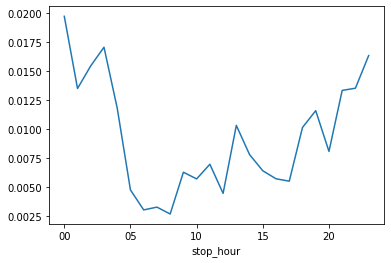

In [120]:
df.groupby(['stop_hour'])['drugs_related_stop'].mean().plot()

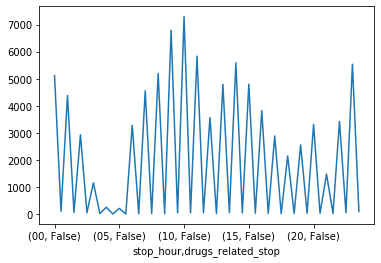

In [121]:
df.groupby(['stop_hour'])['drugs_related_stop'].value_counts().plot()

# 7. Do most stops occur at night?

In [122]:
df.head()

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,year,stop_hour
0,2005-01-02,2020-06-07 01:55:00,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,2005,01
1,2005-01-18,2020-06-07 08:15:00,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,2005,08
2,2005-01-23,2020-06-07 23:15:00,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,2005,23
3,2005-02-20,2020-06-07 17:15:00,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,2005,17
4,2005-03-14,2020-06-07 10:00:00,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,2005,10


In [127]:
df['stop_hour'] = df['stop_hour'].astype(int)

In [132]:
df['stop_hour'].value_counts(ascending=True)

5      210
4      254
3     1172
21    1499
18    2168
19    2587
17    2900
2     2975
6     3290
20    3340
22    3473
12    3582
16    3844
1     4442
7     4572
15    4832
13    4842
8     5210
0     5221
23    5629
14    5634
11    5877
9     6838
10    7350
Name: stop_hour, dtype: int64

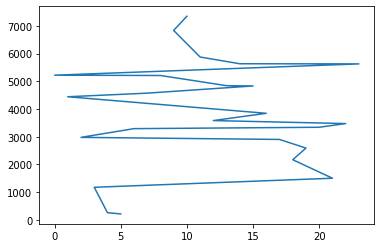

In [133]:
df['stop_hour'].value_counts().plot()

In [135]:
df['stop_hour'].value_counts().sort_index()

0     5221
1     4442
2     2975
3     1172
4      254
5      210
6     3290
7     4572
8     5210
9     6838
10    7350
11    5877
12    3582
13    4842
14    5634
15    4832
16    3844
17    2900
18    2168
19    2587
20    3340
21    1499
22    3473
23    5629
Name: stop_hour, dtype: int64

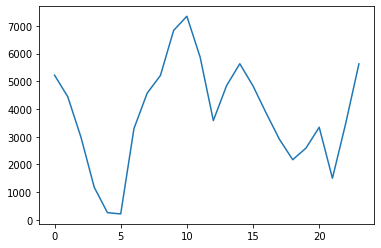

In [136]:
df['stop_hour'].value_counts().sort_index().plot()

# 8. Find the bad data in stop_duration column and fix it.

In [142]:
df.head()

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,year,stop_hour
0,2005-01-02,2020-06-07 01:55:00,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,2005,1
1,2005-01-18,2020-06-07 08:15:00,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,2005,8
2,2005-01-23,2020-06-07 23:15:00,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,2005,23
3,2005-02-20,2020-06-07 17:15:00,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,2005,17
4,2005-03-14,2020-06-07 10:00:00,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,2005,10


In [139]:
df.stop_duration.unique()

array(['0-15 Min', '16-30 Min', '30+ Min', nan, '2', '1'], dtype=object)

In [143]:
df.stop_duration.dtype

dtype('O')

In [141]:
df.stop_duration.value_counts(dropna=False)

0-15 Min     69543
16-30 Min    13635
NaN           5333
30+ Min       3228
1                1
2                1
Name: stop_duration, dtype: int64

In [148]:
import numpy as np

In [149]:
df['stop_duration'].replace('NaN', np.nan, inplace=True)

In [150]:
df.stop_duration.unique()

array(['0-15 Min', '16-30 Min', '30+ Min', nan], dtype=object)

In [152]:
df.stop_duration.value_counts(dropna=False)

0-15 Min     69543
16-30 Min    13635
NaN           5335
30+ Min       3228
Name: stop_duration, dtype: int64